In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as s
import sklearn 
from sklearn import metrics
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
import xgboost
from xgboost import XGBClassifier
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler

In [2]:
df=pd.read_csv("WineQT.csv")


In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


In [5]:
df.shape

(1143, 13)

In [6]:
df.size

14859

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [9]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [10]:
for c in df.columns:
    if df[c].isnull().sum()>0:
        df[c]=df[c].fillna(df[c].mean())
df.isnull().sum().sum()

0

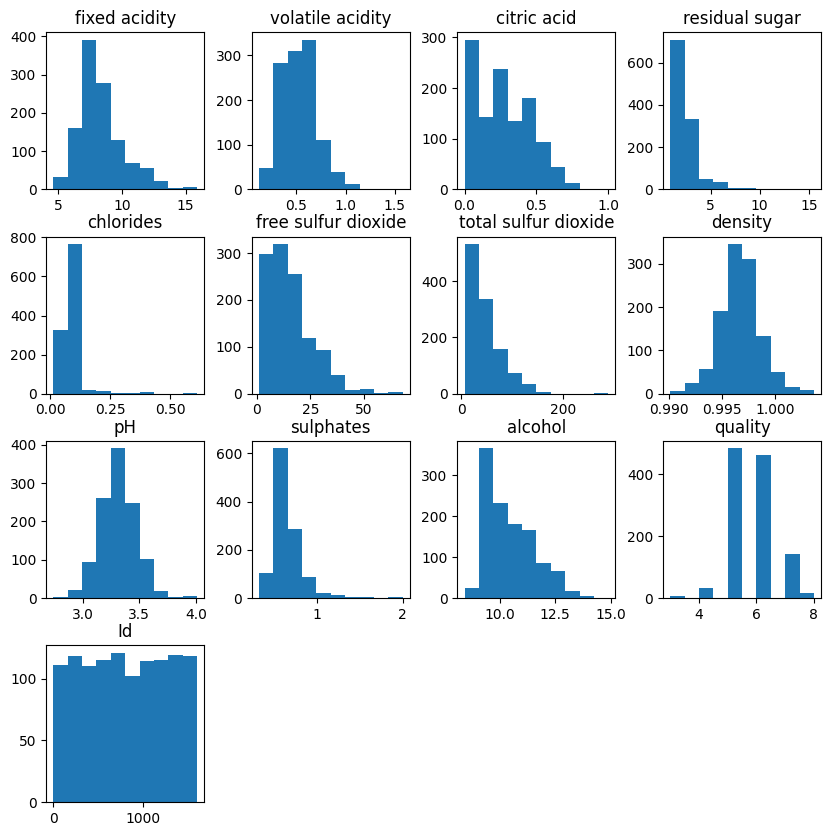

In [11]:
df.hist(grid=False,bins=10,figsize=(10,10))
plt.show()

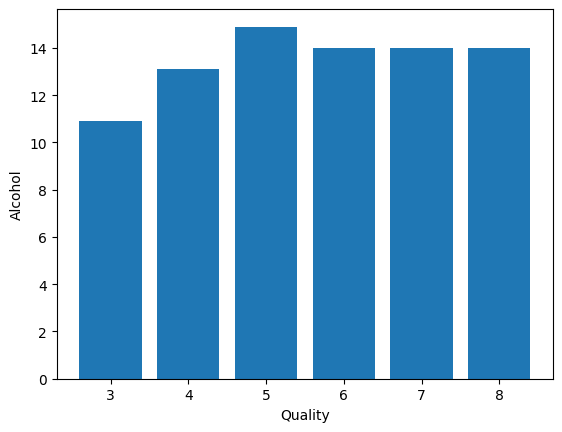

In [12]:
plt.bar(df['quality'],df['alcohol'])
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()

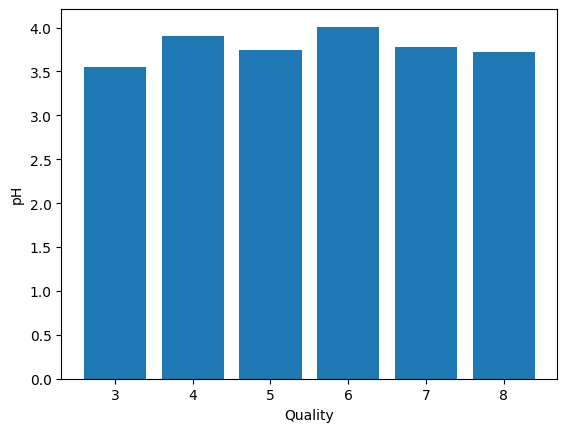

In [13]:
plt.bar(df['quality'],df['pH'])
plt.xlabel('Quality')
plt.ylabel('pH')
plt.show()

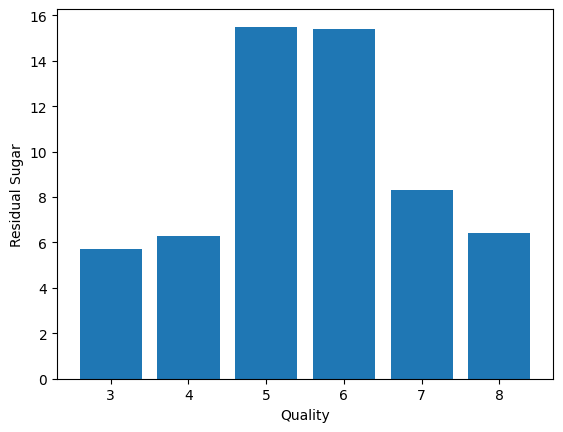

In [14]:
plt.bar(df['quality'],df['residual sugar'])
plt.xlabel('Quality')
plt.ylabel('Residual Sugar')
plt.show()

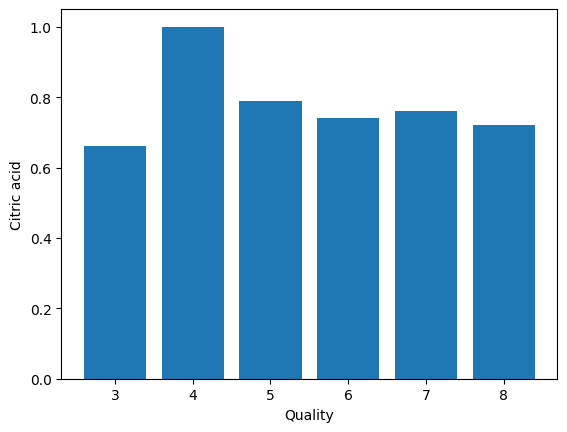

In [15]:
plt.bar(df['quality'],df['citric acid'])
plt.xlabel('Quality')
plt.ylabel('Citric acid')
plt.show()

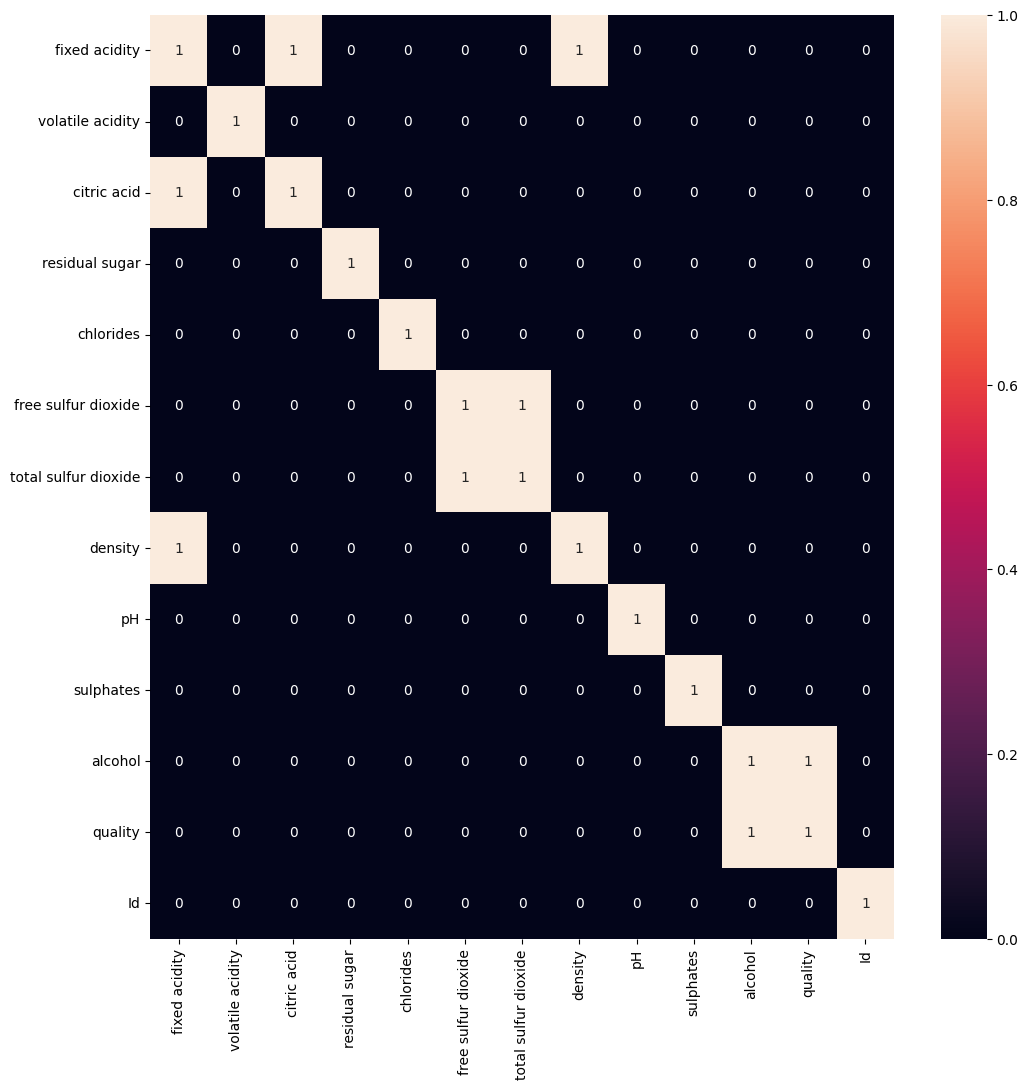

In [16]:
plt.figure(figsize=(12, 12))
s.heatmap(df.corr() > 0.4, annot=True, cbar=True)
plt.show()

In [17]:
df=df.drop('total sulfur dioxide',axis=1)

In [18]:
df['Grade A']=[0 if a<4 else 1 for a in df.quality]

In [19]:
df.replace({'white':1, 'red':0}, inplace=True)

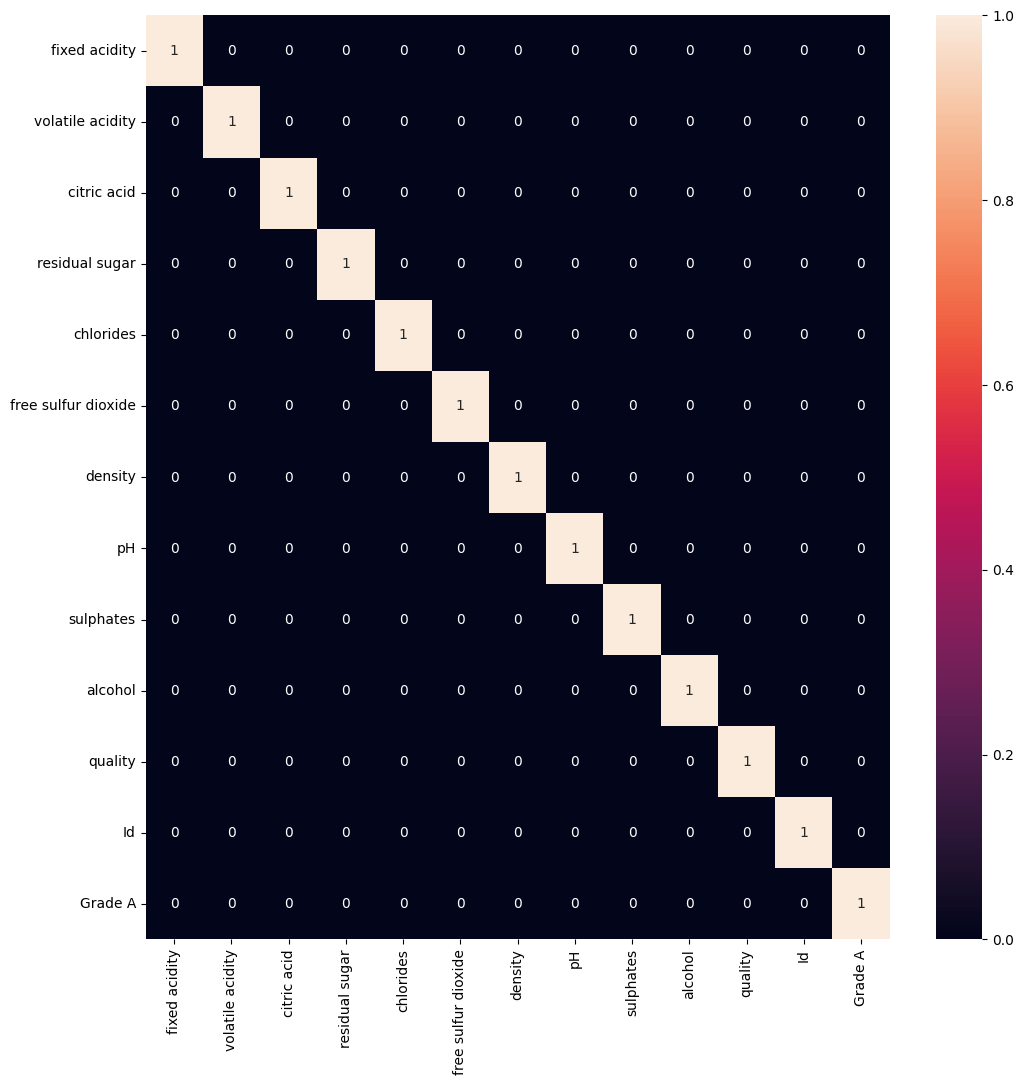

In [20]:
plt.figure(figsize=(12, 12))
s.heatmap(df.corr() > 0.7, annot=True, cbar=True)
plt.show()

In [21]:
feature=df.drop(['quality','Grade A'], axis=1)
target=df['Grade A']
x_train, x_test, y_train, y_test=train_test_split(feature,target,random_state=40, test_size=0.2)


In [22]:
x_train.shape

(914, 11)

In [23]:
x_test.shape

(229, 11)

In [24]:
y_train.shape

(914,)

In [25]:
y_test.shape

(229,)

In [26]:
norma=MinMaxScaler()
x_train=norma.fit_transform(x_train)
x_test=norma.transform(x_test)

In [27]:
prototype = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]

In [28]:
for i in range(3):
    prototype[i].fit(x_train, y_train)
 
    print(f'{prototype[i]} : ')
    print('Development Precision : ', metrics.roc_auc_score(y_train, prototype[i].predict(x_train)))
    print('Verification Precision : ', metrics.roc_auc_score(y_test, prototype[i].predict(x_test)))
    print()

LogisticRegression() : 
Development Precision :  0.5
Verification Precision :  0.5

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) : 
Development Precision :  0.9
Verification Precision :  0.5

SVC() : 
Development Precision :  0.5
Verification Precision :  0.5



In [29]:
print(metrics.classification_report(y_test, prototype[1].predict(x_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00       228

    accuracy                           1.00       229
   macro avg       0.50      0.50      0.50       229
weighted avg       0.99      1.00      0.99       229



C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif